<div style="text-align: right">26th September 2023</div>


# AFIN3010 Group Assignment 2023 S2
### Case Study: Evaluating Creditworthiness in the Age of Fintech

#### Group Members: 
* Joshua Hamamoto: 45863946
* Max Hodgie: 45648190
* Nicholas Tokareff: 45649766
* Ryan Soutar: 45623481

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 1. Introduction to Dataset

In [2]:
#importing datasets
loan_df=pd.read_csv('loan_application_simulation.csv')
repay_df=pd.read_csv('repayment_behavior_simulation.csv')

In [3]:
#Visual inspection of datasets
display(loan_df.head())
display(repay_df.head())

,Applicant_ID,Month,Monthly_Income,Annual_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term,Purpose,Approval_Status
0,1,1,5183.323695,68000.0,part time,Own,8,59,72,15,6,922.750076,526.172189,478.838099,613.691429,233.234270,NaN,NaN,NaN,NaN
1,1,2,5303.792402,68000.0,part time,Own,8,59,72,15,6,1224.588843,772.986555,288.202223,532.934475,253.592265,NaN,NaN,NaN,NaN
2,1,3,5952.849727,68000.0,part time,Own,8,59,72,15,6,689.611784,511.166729,570.383323,620.316175,239.621365,NaN,NaN,NaN,NaN
3,1,4,5817.215818,68000.0,part time,Own,8,59,72,15,6,1599.844501,348.729081,349.287851,950.032027,189.052402,NaN,NaN,NaN,NaN
4,1,5,5265.616072,68000.0,part time,Own,8,59,72,15,6,986.321474,769.375634,345.671968,952.947648,180.274156,NaN,NaN,NaN,NaN


,Applicant_ID,Loan_Amount_Requested,Loan_Term,Interest_Rate,Monthly_Payment,Defaulted,Number_of_Delinquencies
0,1,12116.231097,9,0.14,2449.518859,0,1
1,3,2970.974279,7,0.09,590.304415,0,5
2,4,3888.147185,24,0.14,568.846978,1,2
3,6,10955.281895,7,0.10,2250.275152,0,1
4,7,10924.348421,18,0.10,1332.008231,0,2


In [4]:
#Dataset columns
print("Loan applicant dataset columns:")
display(loan_df.columns)
print("Repayment dataset columns: ")
display(repay_df.columns)

Loan applicant dataset columns:


Index(['Applicant_ID', 'Month', 'Monthly_Income', 'Annual_Income',
       'Employment_Status', 'House_Status', 'Employment_History_Years',
       'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
       'Number_of_Open_Accounts', 'Credit_History_Years', 'Food_Expense',
       'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense',
       'Environmental_Spending', 'Loan_Amount_Requested', 'Loan_Term',
       'Purpose', 'Approval_Status'],
      dtype='object')

Repayment dataset columns: 


Index(['Applicant_ID', 'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate',
       'Monthly_Payment', 'Defaulted', 'Number_of_Delinquencies'],
      dtype='object')

## 1.1 Dataset Breakdown
Examining loan application and repayment dataset. 

Note:
* Although month variable is labeled as an integer, it is a categorical variable
* Although defaulted variable is labeled as an integer, it is a categorical (binary) variable

In [5]:
loan_df.dtypes

Applicant_ID                        int64
Month                               int64
Monthly_Income                    float64
Annual_Income                     float64
Employment_Status                  object
House_Status                       object
Employment_History_Years            int64
Online_Spending_Behavior_Score      int64
Utility_Bill_Payment_Score          int64
Number_of_Open_Accounts             int64
Credit_History_Years                int64
Food_Expense                      float64
Transportation_Expense            float64
Home_Utility_Expense              float64
Shopping_Expense                  float64
Environmental_Spending            float64
Loan_Amount_Requested             float64
Loan_Term                         float64
Purpose                            object
Approval_Status                    object
dtype: object

In [6]:
repay_df.dtypes

Applicant_ID                 int64
Loan_Amount_Requested      float64
Loan_Term                    int64
Interest_Rate              float64
Monthly_Payment            float64
Defaulted                    int64
Number_of_Delinquencies      int64
dtype: object

In [7]:
loan_df.describe()

,Applicant_ID,Month,Monthly_Income,Annual_Income,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term
count,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1000.000000,1000.000000
mean,500.500000,6.500000,4932.558922,59244.00000,10.629000,49.438000,49.438000,7.84800,10.452000,987.018564,495.151743,371.290708,863.547174,148.303553,15128.387675,14.632000
std,288.687019,3.452196,1904.372589,22620.72292,5.803634,30.020714,29.192142,4.31908,5.790725,491.807571,244.857417,163.076572,404.508461,83.945173,9122.000866,5.502623
min,1.000000,1.000000,1521.651247,20000.00000,1.000000,0.000000,0.000000,1.00000,1.000000,163.173791,86.222293,80.427966,156.240166,16.288982,1462.755142,6.000000
25%,250.750000,3.750000,3330.789149,40000.00000,5.000000,23.750000,23.750000,4.00000,5.000000,596.718068,303.222940,239.763151,544.759385,81.750580,8096.853227,10.000000
50%,500.500000,6.500000,4858.307750,58500.00000,11.000000,49.000000,51.000000,8.00000,10.000000,904.303724,449.318679,354.411082,799.263232,129.519412,13480.033042,15.000000
75%,750.250000,9.250000,6484.582873,78000.00000,16.000000,77.000000,75.000000,11.00000,16.000000,1293.286079,648.690845,480.031500,1119.362116,201.842630,19722.671554,19.000000
max,1000.000000,12.000000,9157.823992,100000.00000,20.000000,100.000000,100.000000,15.00000,20.000000,2651.161520,1328.461090,888.575411,2247.545444,442.369304,43116.665895,24.000000


In [8]:
repay_df.describe()

,Applicant_ID,Loan_Amount_Requested,Loan_Term,Interest_Rate,Monthly_Payment,Defaulted,Number_of_Delinquencies
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,487.590000,13914.512675,14.620000,0.093050,1926.487516,0.060000,2.455000
std,288.798743,8992.505642,5.382195,0.035211,1312.972192,0.237784,1.720574
min,1.000000,2689.429303,6.000000,0.040000,233.471041,0.000000,0.000000
25%,250.750000,7247.969924,10.000000,0.060000,895.839619,0.000000,1.000000
50%,500.500000,12044.833830,15.000000,0.090000,1678.476077,0.000000,2.000000
75%,750.250000,18440.131307,19.000000,0.120000,2573.159367,0.000000,4.000000
max,1000.000000,42474.519838,24.000000,0.150000,7042.623718,1.000000,5.000000


# 2. Descriptive Statistics

Splitting variables into categorical "cat" and numerical "numeric" dataframes. Allowing for efficiency analysis

In [9]:
numeric_loan_df=loan_df[['Applicant_ID', 'Monthly_Income', 'Annual_Income', 'Employment_History_Years',
       'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
       'Number_of_Open_Accounts', 'Credit_History_Years', 'Food_Expense',
       'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense',
       'Environmental_Spending', 'Loan_Amount_Requested', 'Loan_Term']].copy()
cat_loan_df=loan_df[['Employment_Status','Month','House_Status','Purpose', 'Approval_Status']].copy()
numeric_repay_df=repay_df[['Applicant_ID', 'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate',
       'Monthly_Payment','Number_of_Delinquencies']].copy()
cat_repay_df=repay_df[['Defaulted']].copy()

In [10]:
numeric_loan_df.columns

Index(['Applicant_ID', 'Monthly_Income', 'Annual_Income',
       'Employment_History_Years', 'Online_Spending_Behavior_Score',
       'Utility_Bill_Payment_Score', 'Number_of_Open_Accounts',
       'Credit_History_Years', 'Food_Expense', 'Transportation_Expense',
       'Home_Utility_Expense', 'Shopping_Expense', 'Environmental_Spending',
       'Loan_Amount_Requested', 'Loan_Term'],
      dtype='object')

In [11]:
cat_loan_df.columns

Index(['Employment_Status', 'Month', 'House_Status', 'Purpose',
       'Approval_Status'],
      dtype='object')

In [12]:
numeric_repay_df.columns

Index(['Applicant_ID', 'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate',
       'Monthly_Payment', 'Number_of_Delinquencies'],
      dtype='object')

In [13]:
cat_repay_df.columns

Index(['Defaulted'], dtype='object')

## 2.1 Basic Statistics
Mean, median, mode, standard deviation, and range for numerical variables. For categorical variables, frequency distributions.

#### Loan Application Data - Numerical Variables

1) Mean

In [14]:
print(numeric_loan_df.mean())

Applicant_ID                        500.500000
Monthly_Income                     4932.558922
Annual_Income                     59244.000000
Employment_History_Years             10.629000
Online_Spending_Behavior_Score       49.438000
Utility_Bill_Payment_Score           49.438000
Number_of_Open_Accounts               7.848000
Credit_History_Years                 10.452000
Food_Expense                        987.018564
Transportation_Expense              495.151743
Home_Utility_Expense                371.290708
Shopping_Expense                    863.547174
Environmental_Spending              148.303553
Loan_Amount_Requested             15128.387675
Loan_Term                            14.632000
dtype: float64


2) Median

In [15]:
print(numeric_loan_df.median())

Applicant_ID                        500.500000
Monthly_Income                     4858.307750
Annual_Income                     58500.000000
Employment_History_Years             11.000000
Online_Spending_Behavior_Score       49.000000
Utility_Bill_Payment_Score           51.000000
Number_of_Open_Accounts               8.000000
Credit_History_Years                 10.000000
Food_Expense                        904.303724
Transportation_Expense              449.318679
Home_Utility_Expense                354.411082
Shopping_Expense                    799.263232
Environmental_Spending              129.519412
Loan_Amount_Requested             13480.033042
Loan_Term                            15.000000
dtype: float64


3) Standard Deviation

In [16]:
print(numeric_loan_df.std())

Applicant_ID                        288.687019
Monthly_Income                     1904.372589
Annual_Income                     22620.722920
Employment_History_Years              5.803634
Online_Spending_Behavior_Score       30.020714
Utility_Bill_Payment_Score           29.192142
Number_of_Open_Accounts               4.319080
Credit_History_Years                  5.790725
Food_Expense                        491.807571
Transportation_Expense              244.857417
Home_Utility_Expense                163.076572
Shopping_Expense                    404.508461
Environmental_Spending               83.945173
Loan_Amount_Requested              9122.000866
Loan_Term                             5.502623
dtype: float64


4) Range

In [17]:
numeric_loan_df_range = numeric_loan_df.max() - numeric_loan_df.min()
print(numeric_loan_df_range)

Applicant_ID                        999.000000
Monthly_Income                     7636.172746
Annual_Income                     80000.000000
Employment_History_Years             19.000000
Online_Spending_Behavior_Score      100.000000
Utility_Bill_Payment_Score          100.000000
Number_of_Open_Accounts              14.000000
Credit_History_Years                 19.000000
Food_Expense                       2487.987729
Transportation_Expense             1242.238797
Home_Utility_Expense                808.147445
Shopping_Expense                   2091.305278
Environmental_Spending              426.080322
Loan_Amount_Requested             41653.910752
Loan_Term                            18.000000
dtype: float64


5) Mode

In [18]:
#Mode for Numerical Variablesin Loan application Dataset
numeric_loan_df_mode = numeric_loan_df[['Annual_Income','Employment_History_Years',
                                        'Online_Spending_Behavior_Score','Utility_Bill_Payment_Score',
                                        'Number_of_Open_Accounts','Credit_History_Years','Loan_Term']].mode()
numeric_loan_df_mode.head(1)

,Annual_Income,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Loan_Term
0,93000.0,4.0,1,95.0,11.0,19.0,16.0


#### Loan Application Data - Categorical Variables

6) Frequency Distribution

In [19]:
# frequency distributions for categorical variable
for column in cat_loan_df.columns:
    print(f"Frequency distribution for {column}:\n")
    print(cat_loan_df[column].value_counts(dropna=False))
    print("-" * 40)

Frequency distribution for Employment_Status:

full time    6480
part time    5520
Name: Employment_Status, dtype: int64
----------------------------------------
Frequency distribution for Month:

8     1000
1     1000
9     1000
2     1000
10    1000
3     1000
11    1000
4     1000
12    1000
5     1000
6     1000
7     1000
Name: Month, dtype: int64
----------------------------------------
Frequency distribution for House_Status:

Rented    6096
Own       5904
Name: House_Status, dtype: int64
----------------------------------------
Frequency distribution for Purpose:

NaN                   11000
Medical Expenses        264
Debt Consolidation      252
Home Improvement        244
Major Purchase          240
Name: Purpose, dtype: int64
----------------------------------------
Frequency distribution for Approval_Status:

NaN         11000
Rejected      600
Approved      400
Name: Approval_Status, dtype: int64
----------------------------------------


#### Repayment - Numerical Variables

1) Mean

In [20]:
print(numeric_repay_df.mean())

Applicant_ID                 487.590000
Loan_Amount_Requested      13914.512675
Loan_Term                     14.620000
Interest_Rate                  0.093050
Monthly_Payment             1926.487516
Number_of_Delinquencies        2.455000
dtype: float64


2) Median

In [21]:
print(numeric_repay_df.median())

Applicant_ID                 500.500000
Loan_Amount_Requested      12044.833830
Loan_Term                     15.000000
Interest_Rate                  0.090000
Monthly_Payment             1678.476077
Number_of_Delinquencies        2.000000
dtype: float64


3) Standard Deviation 

In [22]:
print(numeric_repay_df.std())

Applicant_ID                288.798743
Loan_Amount_Requested      8992.505642
Loan_Term                     5.382195
Interest_Rate                 0.035211
Monthly_Payment            1312.972192
Number_of_Delinquencies       1.720574
dtype: float64


4) Range

In [23]:
numeric_repay_df_range = numeric_repay_df.max() - numeric_repay_df.min()
print(numeric_repay_df_range)

Applicant_ID                 999.000000
Loan_Amount_Requested      39785.090535
Loan_Term                     18.000000
Interest_Rate                  0.110000
Monthly_Payment             6809.152677
Number_of_Delinquencies        5.000000
dtype: float64


5) Mode

In [24]:
numeric_repay_df_mode = numeric_repay_df[['Loan_Term', 'Interest_Rate', 'Number_of_Delinquencies']].mode()
print(numeric_repay_df_mode)


   Loan_Term  Interest_Rate  Number_of_Delinquencies
0          7           0.08                        1


#### Repayment - Categorical Variables

6) Frequency Distribution

In [25]:
print("Frequency distribution for Defaulted \n")
print(cat_repay_df['Defaulted'].value_counts())

Frequency distribution for Defaulted 

0    376
1     24
Name: Defaulted, dtype: int64


## 2.2 Visualizations
Basic visualizations, consisting of correlation matrices, bar plots, scatter plots and boxplots.

#### 1) Correlation Matrices

##### Correlation Matrix - Loan Application (Numeric Variables)

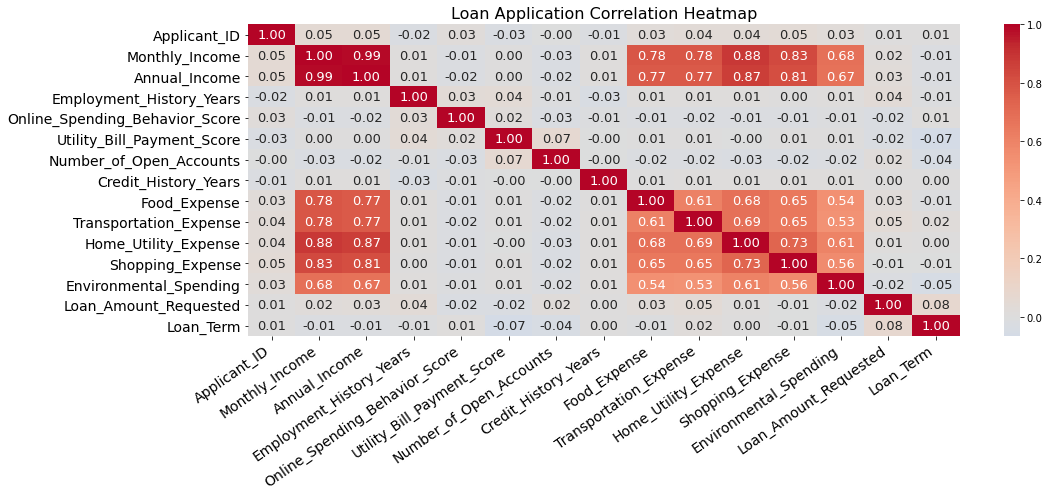

In [26]:
#Loan application correlation matrix
corr = numeric_loan_df.corr()
plt.figure(figsize=(16, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 13}, fmt=".2f")
plt.xticks(rotation=35, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.title('Loan Application Correlation Heatmap',fontsize=16)
plt.tight_layout()

Strong positive correlations exist between Monthly_Income and Annual_Income, which is inherently obvious. Additionally, strong correlations are present between expenses variables, and between expense variables and income.

##### Correlation Matrix - Repaymet Data (Numeric Variables)

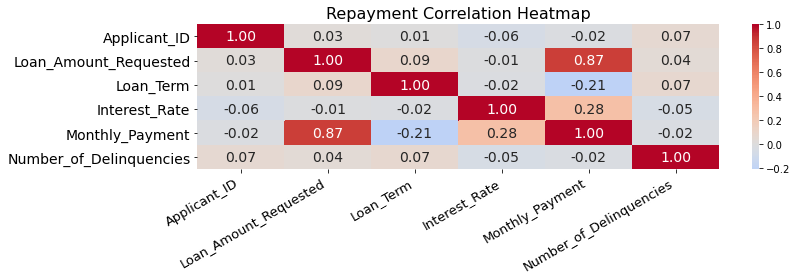

In [27]:
#Repayment correlation matrix
corr = numeric_repay_df.corr()
plt.figure(figsize=(12, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, annot_kws={"size":14},fmt=".2f")
plt.yticks(fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=13)
plt.title('Repayment Correlation Heatmap', fontsize=16)
plt.tight_layout()

Strongest correlation is between Monthly_Payment and Loan_Amount_Requested, of 0.87.

#### 2) Bar Plots for Categorical Variables 

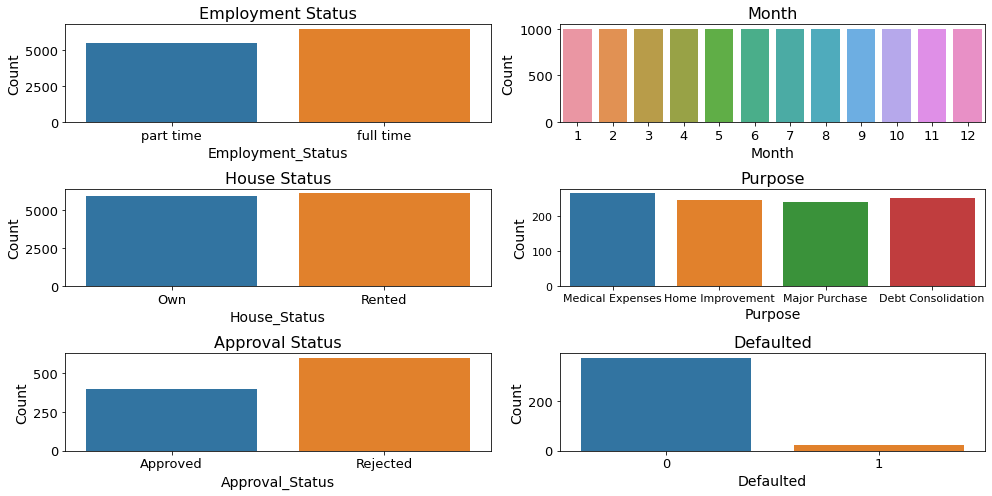

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(14, 7))

#Flattening axes array for easy indexing
axes = axes.flatten()

sns.countplot(data=cat_loan_df, x='Employment_Status', ax=axes[0])
axes[0].set_title('Employment Status', fontsize=16)
axes[0].set_xlabel('Employment_Status',fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].tick_params(labelsize=13)

sns.countplot(data=cat_loan_df, x='Month', ax=axes[1])
axes[1].set_title('Month', fontsize=16)
axes[1].set_xlabel('Month', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(labelsize=13)

sns.countplot(data=cat_loan_df, x='House_Status', ax=axes[2])
axes[2].set_title('House Status',fontsize=16)
axes[2].set_xlabel('House_Status',fontsize=14)
axes[2].set_ylabel('Count',fontsize=14)
axes[2].tick_params(labelsize=13)

sns.countplot(data=cat_loan_df, x='Purpose', ax=axes[3])
axes[3].set_title('Purpose',fontsize=16)
axes[3].set_xlabel('Purpose',fontsize=14)
axes[3].set_ylabel('Count',fontsize=14)
axes[3].tick_params(labelsize=11)


sns.countplot(data=cat_loan_df, x='Approval_Status', ax=axes[4])
axes[4].set_title('Approval Status',fontsize=16)
axes[4].set_xlabel('Approval_Status',fontsize=14)
axes[4].set_ylabel('Count',fontsize=14)
axes[4].tick_params(labelsize=13)

sns.countplot(data=cat_repay_df, x='Defaulted', ax=axes[5])
axes[5].set_title('Defaulted', fontsize=16)
axes[5].set_xlabel('Defaulted', fontsize=14)
axes[5].set_ylabel('Count', fontsize=14)
axes[5].tick_params(labelsize=13)

plt.tight_layout()
plt.show()

#### 3) Scatter Plots

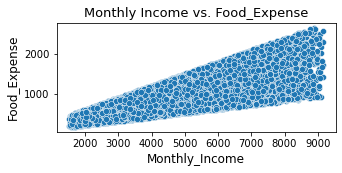

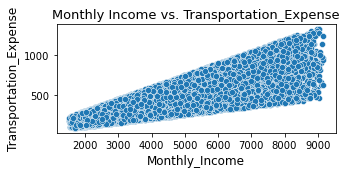

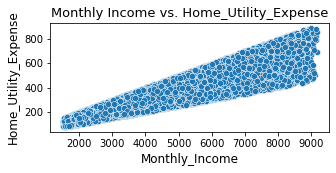

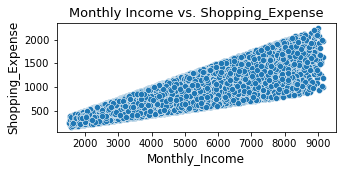

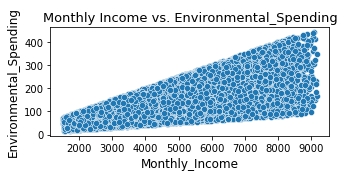

In [29]:
# Combining all expense-related columns based on the provided dataset
expense_columns = ['Food_Expense', 'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense', 'Environmental_Spending']

for expense in expense_columns:
    plt.figure(figsize=(5, 2))
    sns.scatterplot(data=numeric_loan_df, x='Monthly_Income', y=expense)
    plt.xlabel('Monthly_Income', fontsize=12)
    plt.ylabel(expense, fontsize=12)
    plt.title(f'Monthly Income vs. {expense}', fontsize=13)
    plt.show()

#### 4) Box plots

Boxplots for Loan Application (Numerical Variables)

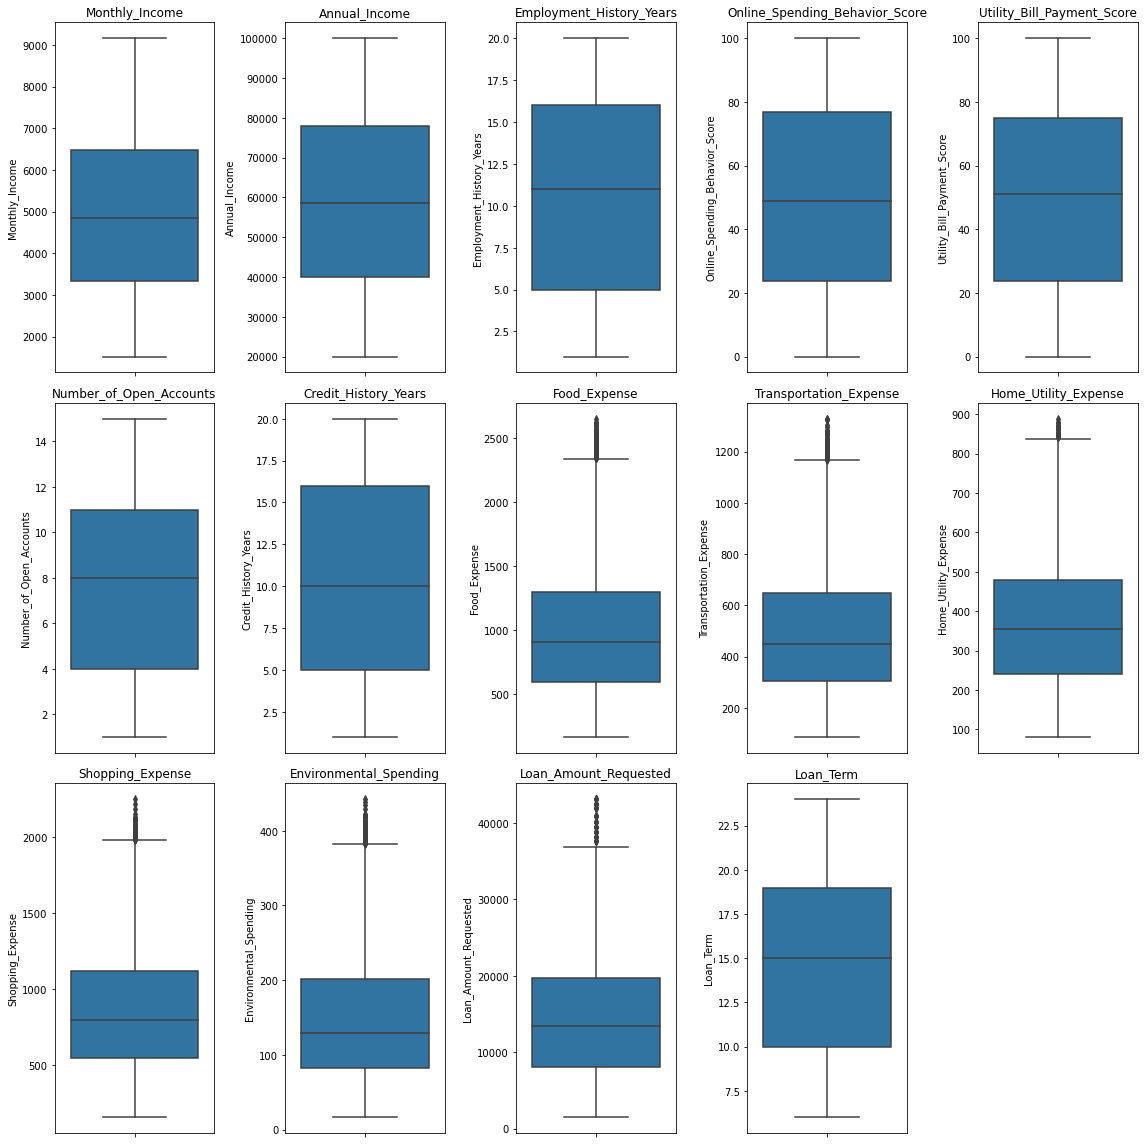

In [30]:
columns_plot = ['Monthly_Income', 'Annual_Income', 'Employment_History_Years', 'Online_Spending_Behavior_Score', 'Utility_Bill_Payment_Score',
    'Number_of_Open_Accounts', 'Credit_History_Years', 'Food_Expense',
    'Transportation_Expense', 'Home_Utility_Expense', 'Shopping_Expense',
    'Environmental_Spending', 'Loan_Amount_Requested', 'Loan_Term'
]

plt.figure(figsize=(16, 16))
for i, column in enumerate(columns_plot):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data=numeric_loan_df, y=column)
    plt.title(column)
    
plt.tight_layout()
plt.show()

Boxplots for Repayment data (Numerical Variables)

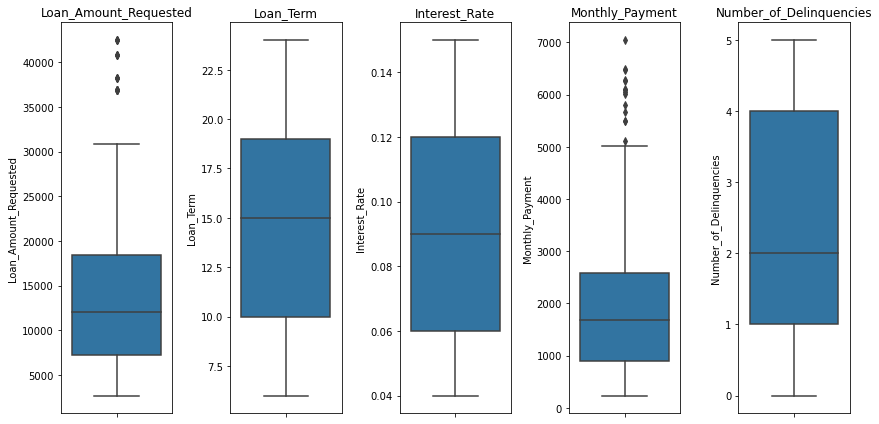

In [58]:
columns_plot = [ 'Loan_Amount_Requested', 'Loan_Term', 'Interest_Rate',
    'Monthly_Payment', 'Number_of_Delinquencies'
]

plt.figure(figsize=(12, 6))

for i, column in enumerate(columns_plot):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(data=numeric_repay_df, y=column)
    plt.title(column)

plt.tight_layout()
plt.show()

#### 5) Histogram

Histogram for Loan Application & Repayment dataset

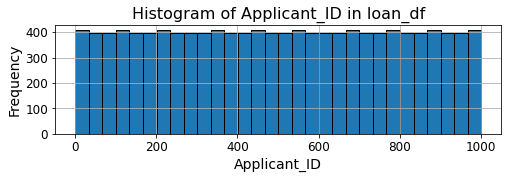

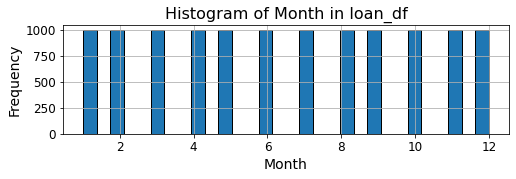

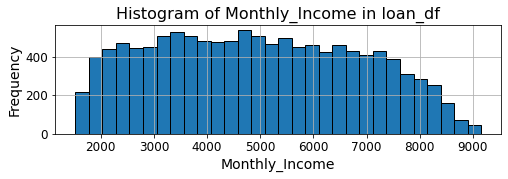

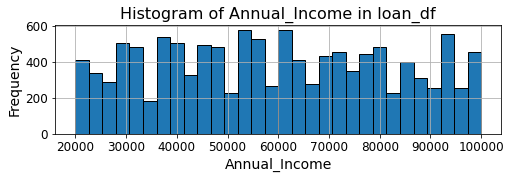

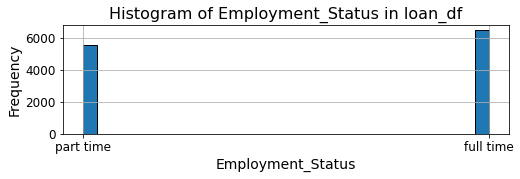

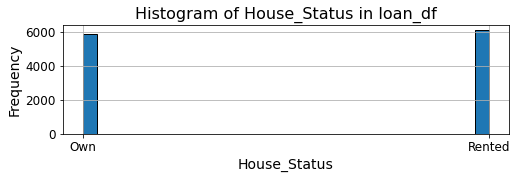

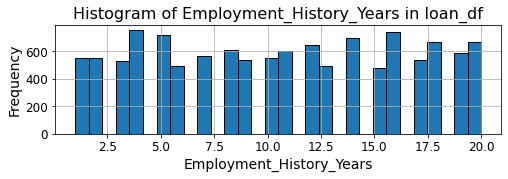

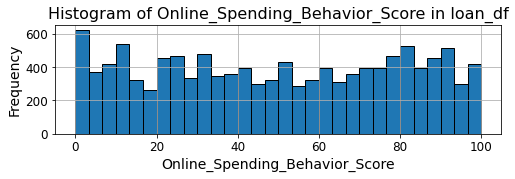

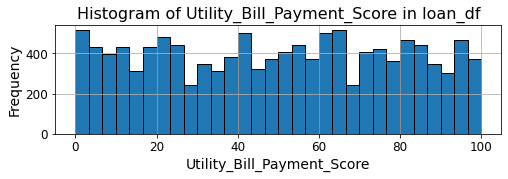

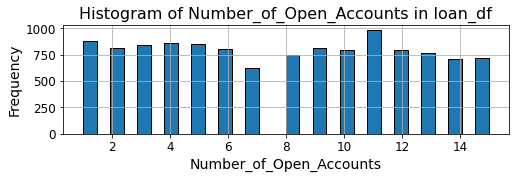

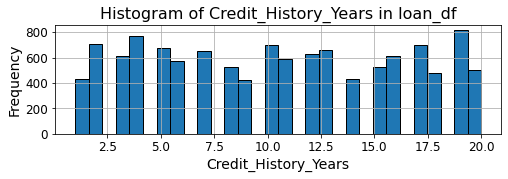

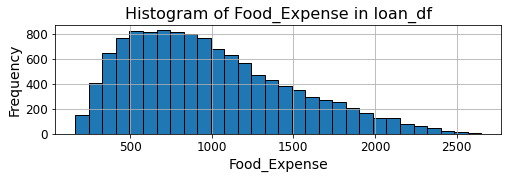

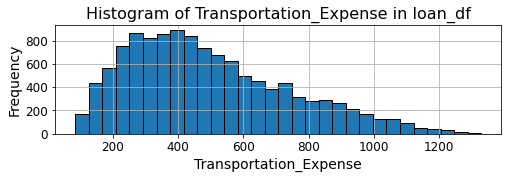

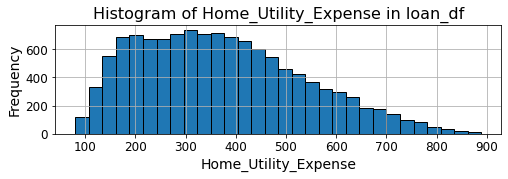

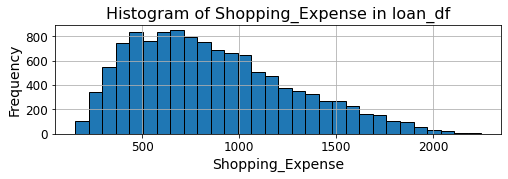

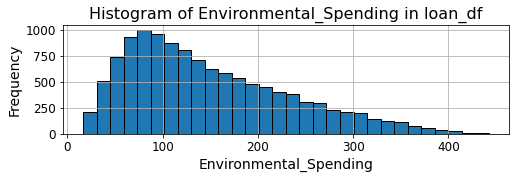

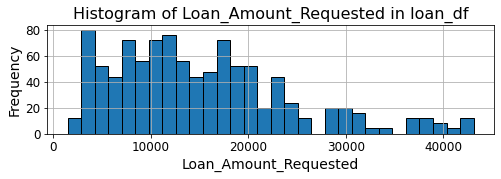

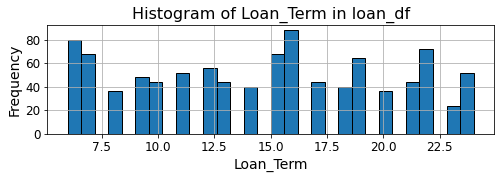

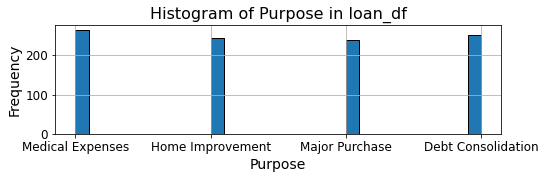

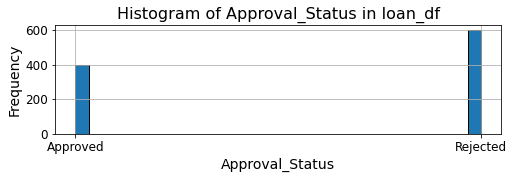

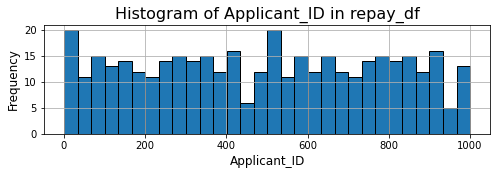

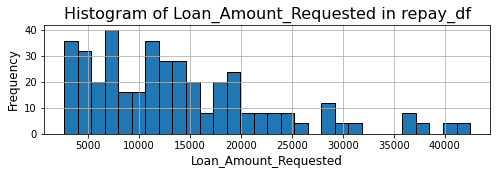

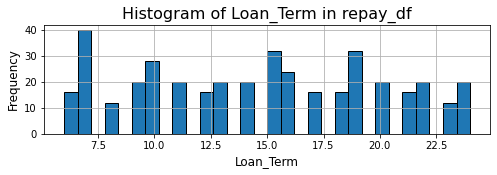

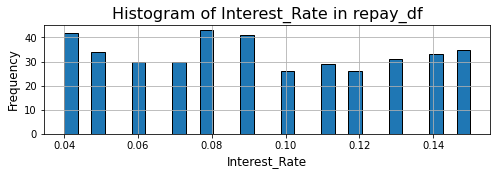

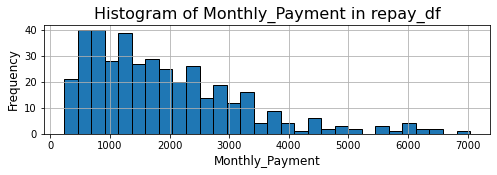

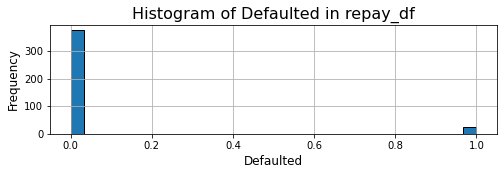

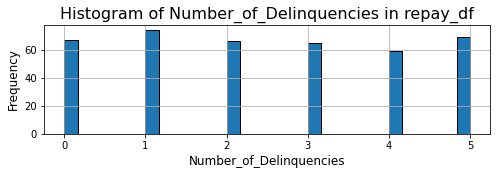

In [32]:
for column in loan_df.columns:
    plt.figure(figsize=(8, 2))
    plt.hist(loan_df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column} in loan_df', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.show()

for column in repay_df.columns:
    plt.figure(figsize=(8, 2))
    plt.hist(repay_df[column].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {column} in repay_df', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

## 2.3 Anomaly Identification

Identifying maximum values which sit outside the IQR:

In [33]:
numeric_loan_df.describe()

,Applicant_ID,Monthly_Income,Annual_Income,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1000.000000,1000.000000
mean,500.500000,4932.558922,59244.00000,10.629000,49.438000,49.438000,7.84800,10.452000,987.018564,495.151743,371.290708,863.547174,148.303553,15128.387675,14.632000
std,288.687019,1904.372589,22620.72292,5.803634,30.020714,29.192142,4.31908,5.790725,491.807571,244.857417,163.076572,404.508461,83.945173,9122.000866,5.502623
min,1.000000,1521.651247,20000.00000,1.000000,0.000000,0.000000,1.00000,1.000000,163.173791,86.222293,80.427966,156.240166,16.288982,1462.755142,6.000000
25%,250.750000,3330.789149,40000.00000,5.000000,23.750000,23.750000,4.00000,5.000000,596.718068,303.222940,239.763151,544.759385,81.750580,8096.853227,10.000000
50%,500.500000,4858.307750,58500.00000,11.000000,49.000000,51.000000,8.00000,10.000000,904.303724,449.318679,354.411082,799.263232,129.519412,13480.033042,15.000000
75%,750.250000,6484.582873,78000.00000,16.000000,77.000000,75.000000,11.00000,16.000000,1293.286079,648.690845,480.031500,1119.362116,201.842630,19722.671554,19.000000
max,1000.000000,9157.823992,100000.00000,20.000000,100.000000,100.000000,15.00000,20.000000,2651.161520,1328.461090,888.575411,2247.545444,442.369304,43116.665895,24.000000


In [34]:
numeric_repay_df.describe()

,Applicant_ID,Loan_Amount_Requested,Loan_Term,Interest_Rate,Monthly_Payment,Number_of_Delinquencies
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,487.590000,13914.512675,14.620000,0.093050,1926.487516,2.455000
std,288.798743,8992.505642,5.382195,0.035211,1312.972192,1.720574
min,1.000000,2689.429303,6.000000,0.040000,233.471041,0.000000
25%,250.750000,7247.969924,10.000000,0.060000,895.839619,1.000000
50%,500.500000,12044.833830,15.000000,0.090000,1678.476077,2.000000
75%,750.250000,18440.131307,19.000000,0.120000,2573.159367,4.000000
max,1000.000000,42474.519838,24.000000,0.150000,7042.623718,5.000000


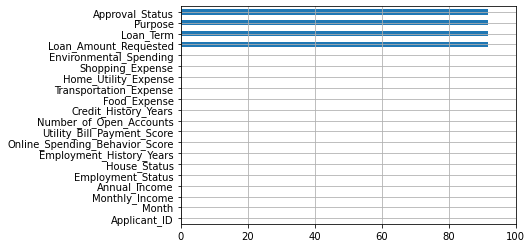

In [35]:
#missing data check
(100 * loan_df.isnull().sum()/len(loan_df)).plot(kind='barh')
plt.xlim(0, 100)
plt.grid();

In the chart above, the variables "Approval_Status," "Purpose," "Loan_Term," and "Loan_Amount_Requested" exhibit missing data. 

However, this is expected because the data is provided annually, not monthly. The gaps appear in the final row of monthly data for each applicant. This discrepancy is addressed when we aggregate the monthly data into an annual format in Section 3.2 (Analysis 2).

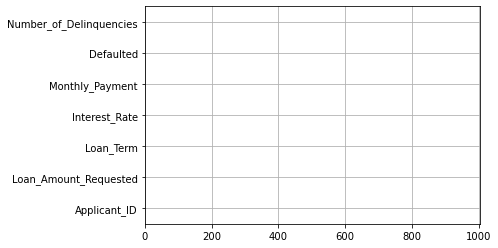

In [36]:
#missing data check
(100 * repay_df.isnull().sum()/len(repay_df)).plot(kind='barh')
plt.xlim(0, 1002)
plt.grid();

In [37]:
numeric_loan_df.head(100)

,Applicant_ID,Monthly_Income,Annual_Income,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term
0,1,5183.323695,68000.0,8,59,72,15,6,922.750076,526.172189,478.838099,613.691429,233.234270,NaN,NaN
1,1,5303.792402,68000.0,8,59,72,15,6,1224.588843,772.986555,288.202223,532.934475,253.592265,NaN,NaN
2,1,5952.849727,68000.0,8,59,72,15,6,689.611784,511.166729,570.383323,620.316175,239.621365,NaN,NaN
3,1,5817.215818,68000.0,8,59,72,15,6,1599.844501,348.729081,349.287851,950.032027,189.052402,NaN,NaN
4,1,5265.616072,68000.0,8,59,72,15,6,986.321474,769.375634,345.671968,952.947648,180.274156,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8,3410.651091,43000.0,20,78,89,1,10,399.422403,299.106465,228.356724,732.441953,75.986467,19650.269288,11.0
96,9,7424.599202,90000.0,3,27,33,10,10,1092.501195,808.057680,680.544333,1844.700326,204.240808,NaN,NaN
97,9,8244.265782,90000.0,3,27,33,10,10,1286.275427,1233.844637,721.244903,1589.458157,348.176153,NaN,NaN
98,9,7291.463692,90000.0,3,27,33,10,10,1284.778972,802.155070,383.935447,1330.405945,130.123795,NaN,NaN


From above, possible outliers include:
* numeric_repay_df: Loan_Amount_Requested, Monthly_Payment
* numeric_loan_df: All the expenses column

However, based the visualisations and judgement, it is assumed that there are not significant.

#### Post Edit:

During the analysis, it became apparent that the sum of monthly income does not equal the annual income figure. It is assumed that this disparity is due to rounding numbers. This was encountered in section 3.2 "Environmental Spending Impact" as the sum of all monthly incomes did not equal the annual income.

This is rectified later in the analysis, as the annual income column is dropped and the exact annual income (sum of all monthly incomes) is used instead.

# 3. Analyzing Data for Insights
## 3.1 Income-Consumption Relationship
Utilising statistical methods to determine and visualize the relationship between income and consumption levels

#### 1) Scatter plots

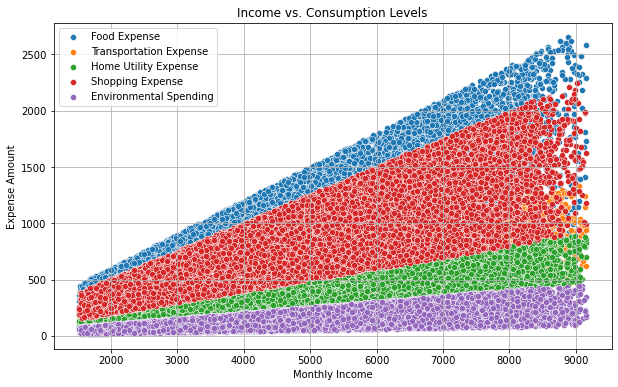

In [38]:
plt.figure(figsize=(10, 6))

# Ploting Monthly_Income against all expense categories
sns.scatterplot(x='Monthly_Income', y='Food_Expense', data=numeric_loan_df, label='Food Expense')
sns.scatterplot(x='Monthly_Income', y='Transportation_Expense', data=numeric_loan_df, label='Transportation Expense')
sns.scatterplot(x='Monthly_Income', y='Home_Utility_Expense', data=numeric_loan_df, label='Home Utility Expense')
sns.scatterplot(x='Monthly_Income', y='Shopping_Expense', data=numeric_loan_df, label='Shopping Expense')
sns.scatterplot(x='Monthly_Income', y='Environmental_Spending', data=numeric_loan_df, label='Environmental Spending')

plt.title('Income vs. Consumption Levels')
plt.xlabel('Monthly Income')
plt.ylabel('Expense Amount')
plt.legend()
plt.grid(True)



Evidently, it appears that all expense variables are positively correlated to monthly income.

#### 2) Correlation

In [39]:
# Calculating correlation between Monthly_Income and expense categories
correlation_food = numeric_loan_df['Monthly_Income'].corr(numeric_loan_df['Food_Expense'])
correlation_transportation = numeric_loan_df['Monthly_Income'].corr(numeric_loan_df['Transportation_Expense'])
correlation_home_utility = numeric_loan_df['Monthly_Income'].corr(numeric_loan_df['Home_Utility_Expense'])
correlation_shopping = numeric_loan_df['Monthly_Income'].corr(numeric_loan_df['Shopping_Expense'])
correlation_environmental = numeric_loan_df['Monthly_Income'].corr(numeric_loan_df['Environmental_Spending'])

print(f"Correlation between Monthly_Income and Food_Expense: {correlation_food:.2f}")
print(f"Correlation between Monthly_Income and Transportation_Expense: {correlation_transportation:.2f}")
print(f"Correlation between Monthly_Income and Home_Utility_Expense: {correlation_home_utility:.2f}")
print(f"Correlation between Monthly_Income and Shopping_Expense: {correlation_shopping:.2f}")
print(f"Correlation between Monthly_Income and Environmental_Spending: {correlation_environmental:.2f}")

Correlation between Monthly_Income and Food_Expense: 0.78
Correlation between Monthly_Income and Transportation_Expense: 0.78
Correlation between Monthly_Income and Home_Utility_Expense: 0.88
Correlation between Monthly_Income and Shopping_Expense: 0.83
Correlation between Monthly_Income and Environmental_Spending: 0.68


It appears that Home_Utility_Expense has the highest correlation to Monthly_Income (0.88), and Environmental_Spending has the lowest (0.68). However, all relationships demonstrate a strong positive correlation towards monthly income.

## 3.2 Environmental Spending Impact
Evaluating and visualizing whether
applicants with higher environmental spending indeed have a lower default
probability.

#### Analysis 1: Using the Environmental_Spending as dollar amount (no manipulation to the variable)

In [40]:
'''
Combining environmental spending data with default data and
Merging the two dataframes on the 'Applicant_ID' column
'''

merged_df = numeric_loan_df[['Applicant_ID', 'Environmental_Spending']].merge(
    repay_df[['Applicant_ID', 'Defaulted']], on='Applicant_ID', how='inner')
merged_df.head()

,Applicant_ID,Environmental_Spending,Defaulted
0,1,233.234270,0
1,1,253.592265,0
2,1,239.621365,0
3,1,189.052402,0
4,1,180.274156,0


###### Box Plot comparison of Environmental_Spending (Defaulted vs Not Defaulted)

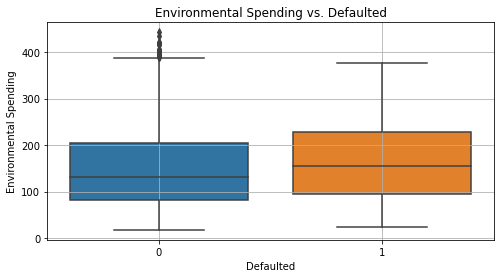

In [41]:
# Create a box plot to compare 'Environmental_Spending' for defaulters and non-defaulters
plt.figure(figsize=(8, 4))
sns.boxplot(x='Defaulted', y='Environmental_Spending', data=merged_df)
plt.title('Environmental Spending vs. Defaulted')
plt.xlabel('Defaulted')
plt.ylabel('Environmental Spending')
plt.grid(True)
plt.show()

Based on the first analysis, it appears that individuals who have defaulted typically show a higher median environmental expenditure. 

However, it's uncertain whether this higher spending is due to a greater emphasis on environmental concerns or just a result of overall higher spending. 

To clarify this, the subsequent analysis will assess environmental spending as a percentage of total expenses, offering a more accurate perspective on environmental spending patterns.

#### Analysis 2: Using the Environmental_Spending as a Percentage of Total Spending (normalising variable)

In [42]:
#Aggregating monthly data into annual form
agg_loan_df=loan_df.groupby('Applicant_ID').agg({
    'Monthly_Income':'sum',  #Sum of monthly income to get annual income
    'Annual_Income': 'last',  #Use last month's value for annual income
    'Employment_Status': 'last',  #Use last month's value for employment status
    'House_Status':'last',  # Use last month's value for house status
    'Employment_History_Years': 'last',  # Use last month's value for employment history years
    'Online_Spending_Behavior_Score': 'last',  # Use the last month's value for online spending score
    'Utility_Bill_Payment_Score': 'last',  #Use the last months value for utility bill payment score
    'Number_of_Open_Accounts':'last', #Take the last month's value for open accounts
    'Credit_History_Years':'last', #Take the last month's value for credit history years
    'Food_Expense': 'sum',  #Take the sum months value for food expense
    'Transportation_Expense': 'sum', #Take sum of all month's value for transportation expense
    'Home_Utility_Expense':'sum',  #Take the sum of all month's value for home utility expense
    'Shopping_Expense':'sum',  #Take the sum of all months value for shopping expense
    'Environmental_Spending': 'sum',  #Take the sum of all month's value for environmental spending
    'Loan_Amount_Requested': 'last',  #Take the last month's value for loan amount requested
    'Loan_Term': 'last',  #Taking last month's value for loan term
    'Purpose': 'last',  #Take the last month's value for purpose
    'Approval_Status': 'last'  #Taking last month's value for approval status
})

#Reseting index to have 'Applicant_ID' as a regular column, not an index.
agg_loan_df.reset_index(inplace=True)

# Using more accurate annual_income data (mentioned in 2.3 Anomaly detection)
agg_loan_df.rename(columns={'Monthly_Income':'Actual_Annual_Income'},inplace=True)
agg_loan_df.head()

,Applicant_ID,Actual_Annual_Income,Annual_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,Transportation_Expense,Home_Utility_Expense,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term,Purpose,Approval_Status
0,1,67598.809998,68000.0,part time,Own,8,59,72,15,6,13781.757854,6318.268896,4991.297348,9952.294934,2365.653810,12116.231097,9.0,Medical Expenses,Approved
1,2,82362.956255,84000.0,part time,Rented,16,1,11,5,6,17654.541235,8474.663157,6273.505874,13957.549245,2537.081565,17124.813793,24.0,Home Improvement,Rejected
2,3,44241.311516,44000.0,part time,Own,10,11,32,8,5,8592.258891,4498.416086,3243.047572,7764.066149,1489.910640,2970.974279,7.0,Home Improvement,Approved
3,4,92011.452488,93000.0,full time,Own,3,65,67,6,19,18910.978164,10047.086737,7144.113617,14777.324041,3211.333038,3888.147185,24.0,Home Improvement,Approved
4,5,36833.334191,37000.0,full time,Rented,12,3,62,11,14,8759.714136,3326.009192,2826.745496,6752.406530,1154.360366,16457.330877,22.0,Medical Expenses,Rejected


In [43]:
#Merge agg_loan_df and repay_df based on Applicant_ID
merged_df = agg_loan_df.merge(repay_df, on='Applicant_ID', how='left')

#Print the merged DataFrame
merged_df.head()

,Applicant_ID,Actual_Annual_Income,Annual_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,...,Loan_Amount_Requested_x,Loan_Term_x,Purpose,Approval_Status,Loan_Amount_Requested_y,Loan_Term_y,Interest_Rate,Monthly_Payment,Defaulted,Number_of_Delinquencies
0,1,67598.809998,68000.0,part time,Own,8,59,72,15,6,...,12116.231097,9.0,Medical Expenses,Approved,12116.231097,9.0,0.14,2449.518859,0.0,1.0
1,2,82362.956255,84000.0,part time,Rented,16,1,11,5,6,...,17124.813793,24.0,Home Improvement,Rejected,NaN,NaN,NaN,NaN,NaN,NaN
2,3,44241.311516,44000.0,part time,Own,10,11,32,8,5,...,2970.974279,7.0,Home Improvement,Approved,2970.974279,7.0,0.09,590.304415,0.0,5.0
3,4,92011.452488,93000.0,full time,Own,3,65,67,6,19,...,3888.147185,24.0,Home Improvement,Approved,3888.147185,24.0,0.14,568.846978,1.0,2.0
4,5,36833.334191,37000.0,full time,Rented,12,3,62,11,14,...,16457.330877,22.0,Medical Expenses,Rejected,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Merge agg_loan_df and repay_df based on Applicant_ID
merge1_df=agg_loan_df.merge(repay_df,on='Applicant_ID',how='inner')

#Dropping duplicate columns 'Loan_Amount_Requested_y','Loan_Term_y' and dropping inaccurate 'Annual_Income' column
merge1_df=merge1_df.drop(['Loan_Amount_Requested_y','Loan_Term_y','Annual_Income'],axis=1)

#Renaming columns for clarity
merge1_df.rename(columns={'Loan_Amount_Requested_x': 'Loan_Amount_Requested'},inplace=True)
merge1_df.rename(columns={'Loan_Term_x':'Loan_Term'},inplace=True)
merge1_df.rename(columns={'Actual_Annual_Income':'Annual_Income'}, inplace=True)
merge1_df.head()

,Applicant_ID,Annual_Income,Employment_Status,House_Status,Employment_History_Years,Online_Spending_Behavior_Score,Utility_Bill_Payment_Score,Number_of_Open_Accounts,Credit_History_Years,Food_Expense,...,Shopping_Expense,Environmental_Spending,Loan_Amount_Requested,Loan_Term,Purpose,Approval_Status,Interest_Rate,Monthly_Payment,Defaulted,Number_of_Delinquencies
0,1,67598.809998,part time,Own,8,59,72,15,6,13781.757854,...,9952.294934,2365.653810,12116.231097,9.0,Medical Expenses,Approved,0.14,2449.518859,0,1
1,3,44241.311516,part time,Own,10,11,32,8,5,8592.258891,...,7764.066149,1489.910640,2970.974279,7.0,Home Improvement,Approved,0.09,590.304415,0,5
2,4,92011.452488,full time,Own,3,65,67,6,19,18910.978164,...,14777.324041,3211.333038,3888.147185,24.0,Home Improvement,Approved,0.14,568.846978,1,2
3,6,68323.547502,part time,Own,11,9,53,13,9,13951.805894,...,10279.373017,2136.014161,10955.281895,7.0,Home Improvement,Approved,0.10,2250.275152,0,1
4,7,66097.959447,part time,Rented,5,85,5,11,5,12683.481494,...,11162.834117,1964.187211,10924.348421,18.0,Major Purchase,Approved,0.10,1332.008231,0,2


In [45]:
#Calculating total expenses
merge1_df['Total_Expense'] = (merge1_df['Food_Expense'] + 
                              merge1_df['Transportation_Expense'] + 
                              merge1_df['Home_Utility_Expense'] + 
                              merge1_df['Shopping_Expense'] + 
                              merge1_df['Environmental_Spending'])
merge1_df['Total_Expense'].head()

0    37409.272842
1    25587.699339
2    54090.835597
3    38198.459655
4    36265.395656
Name: Total_Expense, dtype: float64

In [46]:
#Calcuting envinronmental spending as a percentage of total spending
merge1_df['Environmental_Percentage']=(merge1_df['Environmental_Spending']/merge1_df['Total_Expense'])
merge1_df['Environmental_Percentage'].head()

0    0.063237
1    0.058228
2    0.059369
3    0.055919
4    0.054161
Name: Environmental_Percentage, dtype: float64

###### Box Plot comparison of Environmental_Spending as a % of total spending vs Defaulted

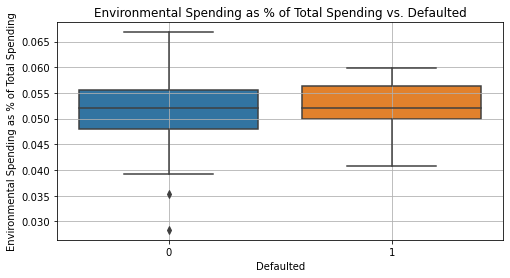

In [47]:
'''
Creating box plot to compare  spending Environmental_Spending' 
as a % of total for defaulters and non-defaulters
'''
plt.figure(figsize=(8, 4))
sns.boxplot(x='Defaulted', y='Environmental_Percentage', data=merge1_df)
plt.title('Environmental Spending as % of Total Spending vs. Defaulted')
plt.xlabel('Defaulted')
plt.ylabel('Environmental Spending as % of Total Spending')
plt.grid(True)

The boxplot illustrates that, visually, there seems to be no discernible difference in the medians of "Environmental Spending as a % of Total Spending" between the defaulted and non-defaulted groups.

However, the range appears to be larger for the non-defaulted group. One possible reason for this could be the larger sample size in this category: non-defaulted = 0 (sample size of 376) and defaulted = 1 (sample size of 240).

##### Distribution of Environmental Spending as % of Total Spending by Default Status

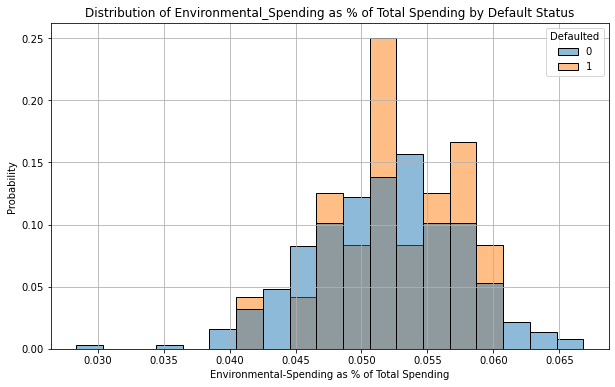

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(merge1_df, x='Environmental_Percentage', hue='Defaulted', stat='probability', common_norm=False)
plt.title('Distribution of Environmental_Spending as % of Total Spending by Default Status')
plt.xlabel('Environmental-Spending as % of Total Spending')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

The above visualization is consistent with the boxplot. Moreoever, the defaulted category seems to have a higher concentration at the median and a narrower range compared to the non-defaulted category.

##### Summary
After adjusting the environmental spending to represent a percentage of total expenditure (analysis 2), there doesn't seem to be a significant difference in the median "Environmental Spending as % of Total Spending" concerning default rates. This is different to the findings in analysis 1. 

This suggests that the proportion of environmental spending relative to total expenditure might have minimal influence on the likelihood of defaulting.

# 4. Predictive Modelling

In this section, a logistic regression model is constructed to forecast default probabilities. The variables incorporated into this model are selected based on insights from the preceding analysis. Furthermore, the model will be evaluated and compared to other models.

## 4.1 Model Creation

#### Model 1: 
All variables are included

In [49]:
'''
Dropping non-predictor columns and dropping
Environmental_Spending as a dollar amount 
(keeping environmental spending as % ) 

'''
X = merge1_df.drop(columns=['Applicant_ID', 'Defaulted','Environmental_Spending'])

'''
One-hot encoding categorical variables, in order for categorical 
variables to be anaylsed.
'''
X = pd.get_dummies(X, drop_first=True)

# Defining Defaulted target variable
y = merge1_df['Defaulted']

# Splitting data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [50]:
#Predictions
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

## 4.2 Model Assessment


 Confusion Matrix:
[[115   0]
 [  5   0]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       115
           1       0.00      0.00      0.00         5

    accuracy                           0.96       120
   macro avg       0.48      0.50      0.49       120
weighted avg       0.92      0.96      0.94       120


 AUC:
AUC: 0.516522


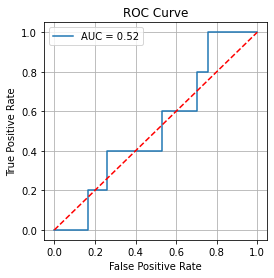

In [51]:
# Suppress warnings to improve output readability
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Confusion matrix to understand true positives, false positives, etc.
print("\n Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Classification report
print("\n Classification Report:")
class_rep = classification_report(y_test, y_pred)
print(class_rep)

#AUC for model evaluation
print("\n AUC:")
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:4f}")

# Plotting ROC curve to visualize model performance
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(4, 4))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

The first model indicates:
* Out of the test set sample 120, the model correctly identified 115 as "not defaulted" and failed to identify any of the 5 who actually "defaulted"
* Model accuracy of 96% for predicting non-defaults
* However, it had failed to correctly predict any of the defaulted category.
* AUC score (which refers to the models ability to distinguish between defaulted and non-defaulted is 0.52, which indicates the model's performance is barely better than random guessing.

## 4.3 Comparison of Models

### 4.3a Feature Analysis

In this section of the report, a feature anaylsis is conducted to gain insight on the importance of specific variables

In [52]:
#fiting random forest classifier to dataset
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

#getting feature importance
importances = rf.feature_importances_

# converting the importances into a DataFrame
feature_importances=pd.DataFrame({'feature': X_train.columns, 'importance':importances})

#sorting dataframe by importances
feature_importances=feature_importances.sort_values(by='importance',ascending=False)

print(feature_importances)

                           feature  importance
2   Online_Spending_Behavior_Score    0.090712
3       Utility_Bill_Payment_Score    0.086339
13                 Monthly_Payment    0.080888
9                 Shopping_Expense    0.067690
16        Environmental_Percentage    0.064162
10           Loan_Amount_Requested    0.062806
8             Home_Utility_Expense    0.062411
7           Transportation_Expense    0.061959
6                     Food_Expense    0.059386
0                    Annual_Income    0.053684
1         Employment_History_Years    0.053482
15                   Total_Expense    0.053354
11                       Loan_Term    0.045862
5             Credit_History_Years    0.030181
4          Number_of_Open_Accounts    0.029250
12                   Interest_Rate    0.027061
14         Number_of_Delinquencies    0.020780
18             House_Status_Rented    0.016305
21        Purpose_Medical Expenses    0.015638
19        Purpose_Home Improvement    0.006756
17     Employ

In [53]:
warnings.filterwarnings("ignore",category=UndefinedMetricWarning)

#Selecting top 10 features
top_features = feature_importances['feature'][:10].tolist()

#Change dataset to only include top 10 features
X_train_top =X_train[top_features]
X_test_top=X_test[top_features]


logreg_top=LogisticRegression(max_iter=10000)
logreg_top.fit(X_train_top, y_train)

#Predictictions on test dataset
y_pred_top=logreg_top.predict(X_test_top)
y_pred_prob_top =logreg_top.predict_proba(X_test_top)[:,1]


 Confusion Matrix:
[[115   0]
 [  5   0]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       115
           1       0.00      0.00      0.00         5

    accuracy                           0.96       120
   macro avg       0.48      0.50      0.49       120
weighted avg       0.92      0.96      0.94       120


 AUC:
AUC:0.690435


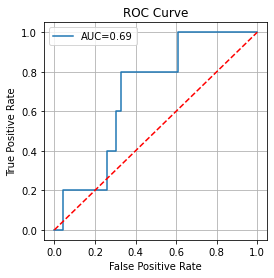

In [54]:
#Confusion matrix
print("\n Confusion Matrix:")
conf_matrix=confusion_matrix(y_test,y_pred_top)
print(conf_matrix)

#Classification report
print("\n Classification Report:")
class_rep=classification_report(y_test,y_pred_top)
print(class_rep)

#AUC for model evaluation
print("\n AUC:")
auc_value=roc_auc_score(y_test, y_pred_prob_top)
print(f"AUC:{auc_value:4f}")

#Plotting ROC curve
false_positive_rate, true_positive_rate, _ =roc_curve(y_test, y_pred_prob_top)
plt.figure(figsize=(4, 4))
plt.plot(false_positive_rate, true_positive_rate,label=f'AUC={auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

Although the model has a higher AUC, it fails to predict any defaults. This could be due to a class imbalance in the defaulted dataset.

### 4.3b Changing Classification Threshold
Default is 0.5 in logistic regression. In this section, the threshold is optimised to improve the model's sensitivity to defaults (true negatives).

Optimal threshold: 0.0708

 AUC:
AUC: 0.734783

Confusion Matrix (Optimal Threshold) :
[[77 38]
 [ 1  4]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.99      0.67      0.80       115
           1       0.10      0.80      0.17         5

    accuracy                           0.68       120
   macro avg       0.54      0.73      0.48       120
weighted avg       0.95      0.68      0.77       120



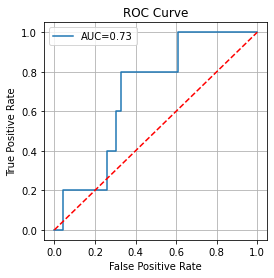

In [55]:
#Get false (fpr) and true (tpr) positive rates and thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob_top)

#euclidean distance for each threshold
distances=np.sqrt((0-fpr)**2+(1-tpr)**2)

#Threshold for minimum distance
optimal_threshold= thresholds[np.argmin(distances)]

print(f"Optimal threshold: {optimal_threshold:.4f}")

#Using optimal threshold to classify the instances
y_pred_optimal =(y_pred_prob_top >= optimal_threshold).astype(int)

print("\n AUC:")
auc_value =roc_auc_score(y_test, y_pred_optimal)
print(f"AUC: {auc_value:4f}")

#Print confusion matrix and classification report
print("\nConfusion Matrix (Optimal Threshold) :")
print(confusion_matrix(y_test,y_pred_optimal))

print("\nClassification Report (Optimal Threshold):")
print(classification_report(y_test,y_pred_optimal))

#Plotting ROC curve
fpr, tpr, thresholds =roc_curve(y_test, y_pred_optimal)
plt.figure(figsize=(4, 4))
plt.plot(false_positive_rate, true_positive_rate,label=f'AUC={auc_value:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Summary of Threshold change

If a the banks top priority is to detect all potential defaults, even at the risk of declining legitimate applications, they should consider a threshold of 0.0708. 

While higher thresholds will minimise true positives, false positives and reduces false negatives, the 0.0708 threshold emphasizes maximum sensitivity to potential defaults at the expense of increased false alarms.

### 4.3c Repeating Model Without Environmental_Spending Variable

The above process is repeated to determine if incorporating the environmental spending data improves model accuracy.

In [56]:
# Drop the Environmental_Percentage column
X_train=X_train.drop(columns='Environmental_Percentage')
X_test=X_test.drop(columns='Environmental_Percentage')

#Fitting random forest classifier to dataset
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

#Getting feature importance
importances =rf.feature_importances_

# Converting the importances into a DataFrame
feature_importances =pd.DataFrame({'feature':X_train.columns, 'importance': importances})

# Sorting dataframe by importances
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(feature_importances)

#Selecting top 10 features
top_features = feature_importances['feature'][:10].tolist()

#Changing dataset to only include top 10 features
X_train_top=X_train[top_features]
X_test_top=X_test[top_features]

logreg_top = LogisticRegression(max_iter=10000)
logreg_top.fit(X_train_top, y_train)

# Predictions on test dataset
y_pred_top =logreg_top.predict(X_test_top)
y_pred_prob_top =logreg_top.predict_proba(X_test_top)[:,1]

                           feature  importance
2   Online_Spending_Behavior_Score    0.098573
3       Utility_Bill_Payment_Score    0.090486
10           Loan_Amount_Requested    0.072523
13                 Monthly_Payment    0.070482
8             Home_Utility_Expense    0.068669
7           Transportation_Expense    0.065728
1         Employment_History_Years    0.064573
6                     Food_Expense    0.064345
15                   Total_Expense    0.064163
0                    Annual_Income    0.056087
9                 Shopping_Expense    0.049389
5             Credit_History_Years    0.044978
4          Number_of_Open_Accounts    0.038516
12                   Interest_Rate    0.037114
11                       Loan_Term    0.037043
14         Number_of_Delinquencies    0.023802
20        Purpose_Medical Expenses    0.016636
17             House_Status_Rented    0.014377
18        Purpose_Home Improvement    0.009836
16     Employment_Status_part time    0.008105
19          P


 AUC:
AUC: 0.650435


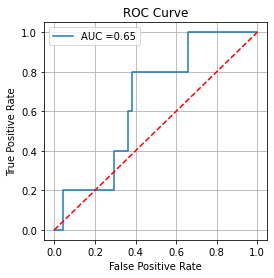

Optimal threshold:0.0656

Confusion Matrix (Optimal Threshold) :
[[71 44]
 [ 1  4]]

Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.99      0.62      0.76       115
           1       0.08      0.80      0.15         5

    accuracy                           0.62       120
   macro avg       0.53      0.71      0.46       120
weighted avg       0.95      0.62      0.73       120



In [57]:
#AUC for model evaluation
print("\n AUC:")
auc_value = roc_auc_score(y_test, y_pred_prob_top)
print(f"AUC: {auc_value:4f}")

#Plotting ROC curve
false_positive_rate, true_positive_rate, _ =roc_curve(y_test,y_pred_prob_top)
plt.figure(figsize=(4, 4))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC ={auc_value:.2f}')
plt.plot([0, 1], [0, 1],'r--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#Get false (fpr) and true (tpr) positive rates and thresholds
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob_top)

#Euclidean distance for each threshold
distances = np.sqrt((0 - fpr)**2 + (1 - tpr)**2)

#Threshold for minimum distance
optimal_threshold = thresholds[np.argmin(distances)]
print(f"Optimal threshold:{optimal_threshold:.4f}")

#Using optimal threshold to classify the instances
y_pred_optimal=(y_pred_prob_top>=optimal_threshold).astype(int)

#Print confusion matrix and classification report
print("\nConfusion Matrix (Optimal Threshold) :")
print(confusion_matrix(y_test,y_pred_optimal))

print("\nClassification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))

The model without the environmental variable is less accurate, as it has:
* a lower AUC of 0.650435 compared the model which includes environmental spending data, which held an AUC score of 0.734783. 
* model identifies more false positives, 44 compared to 38.

Therefore, it is recommended to include environmental spending data, as it provides the highest AUC and has minimal false positives, while accurately detecting 80% of all defualts (true positives)


### 5. Conclusion

To summarise the model development. 
Initially, a logistic regression model was established to predict default probabilities using all features, using environmental spending as a percentage. After evaluating all variables, a refined model was formed focusing on the top ten most significant features.

Initial model evaluation indicated an high accuracy of 96%, however, the model's effectiveness in predicting actual defaults was questionable, as evidenced by an AUC score of 0.52, almost no better than flipping a coin. The second model, which concentrated on the top ten features, showed improved discernibility with an AUC score of 0.69 but still failed to predict any defaults. This issue is theorised to stem from an imbalance in the classes of the 'defaulted' dataset.

Addressing the model's sensitivity to defaults, an optimal threshold of 0.0708 was identified (Section 4.3b). This adaptation improved the model's ability to detect defaults but at the expense of falsely classifying legitimate cases as defaults. Thus, if the primary objective is to flag potential defaults regardless of increasing false alarms, this threshold proves to be the most effective. However, the bank must be cautious of declining valid applications.